In [1]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

In [94]:
warnings.filterwarnings('ignore') 

In [95]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
submission_df = pd.read_csv('/content/gender_submission.csv')

In [96]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [97]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


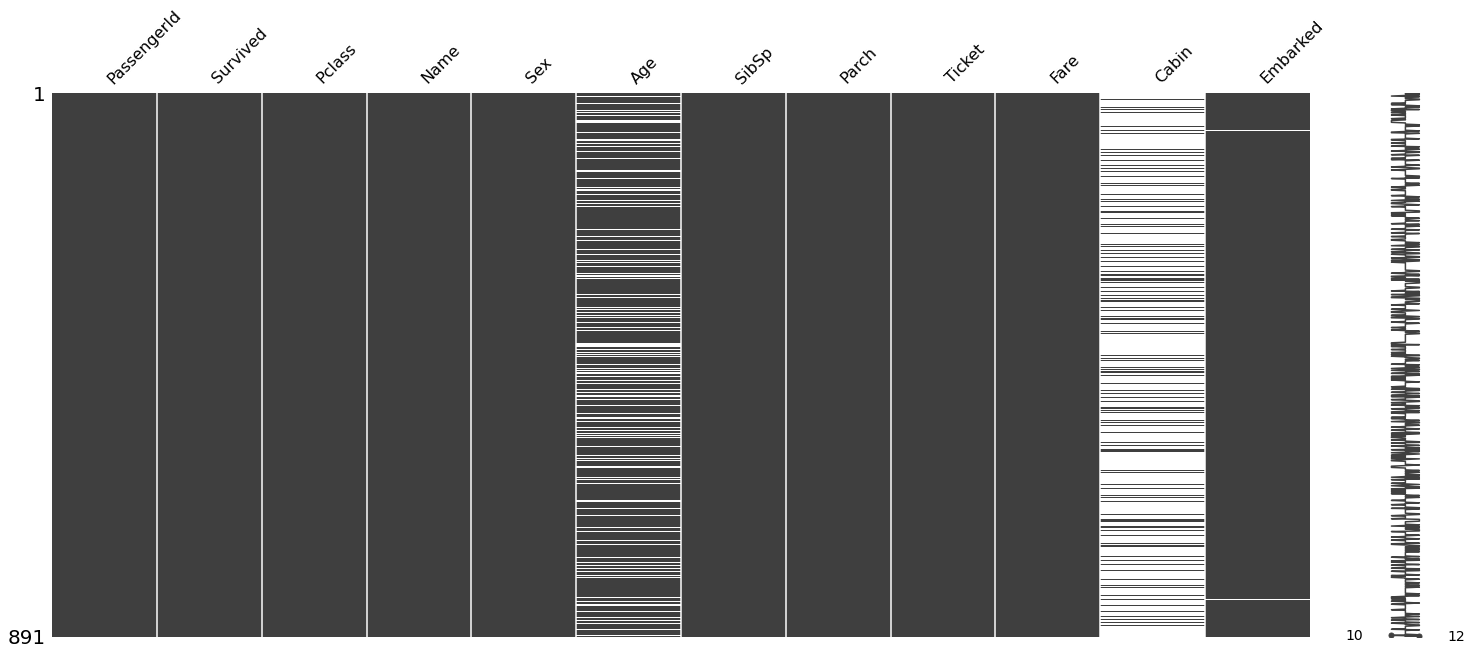

In [99]:
msno.matrix(train_df)

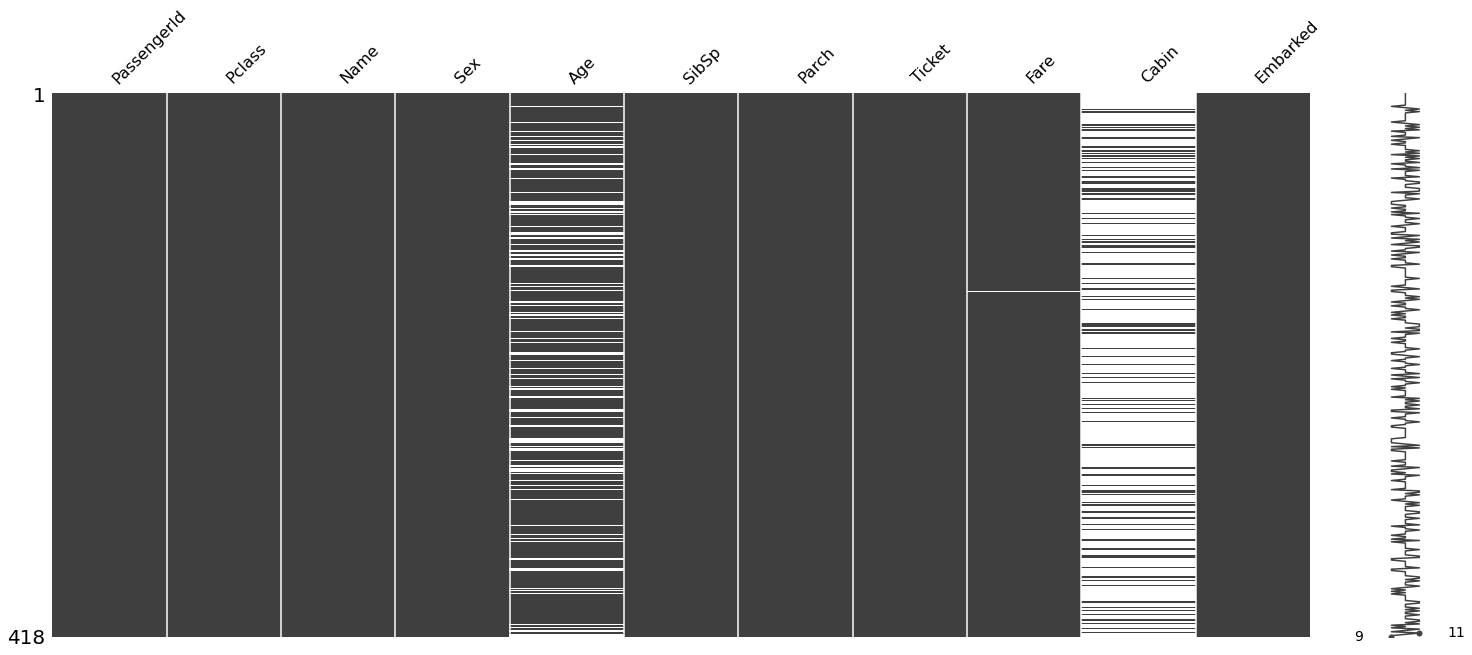

In [100]:
msno.matrix(test_df)

In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [106]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [108]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [109]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [111]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

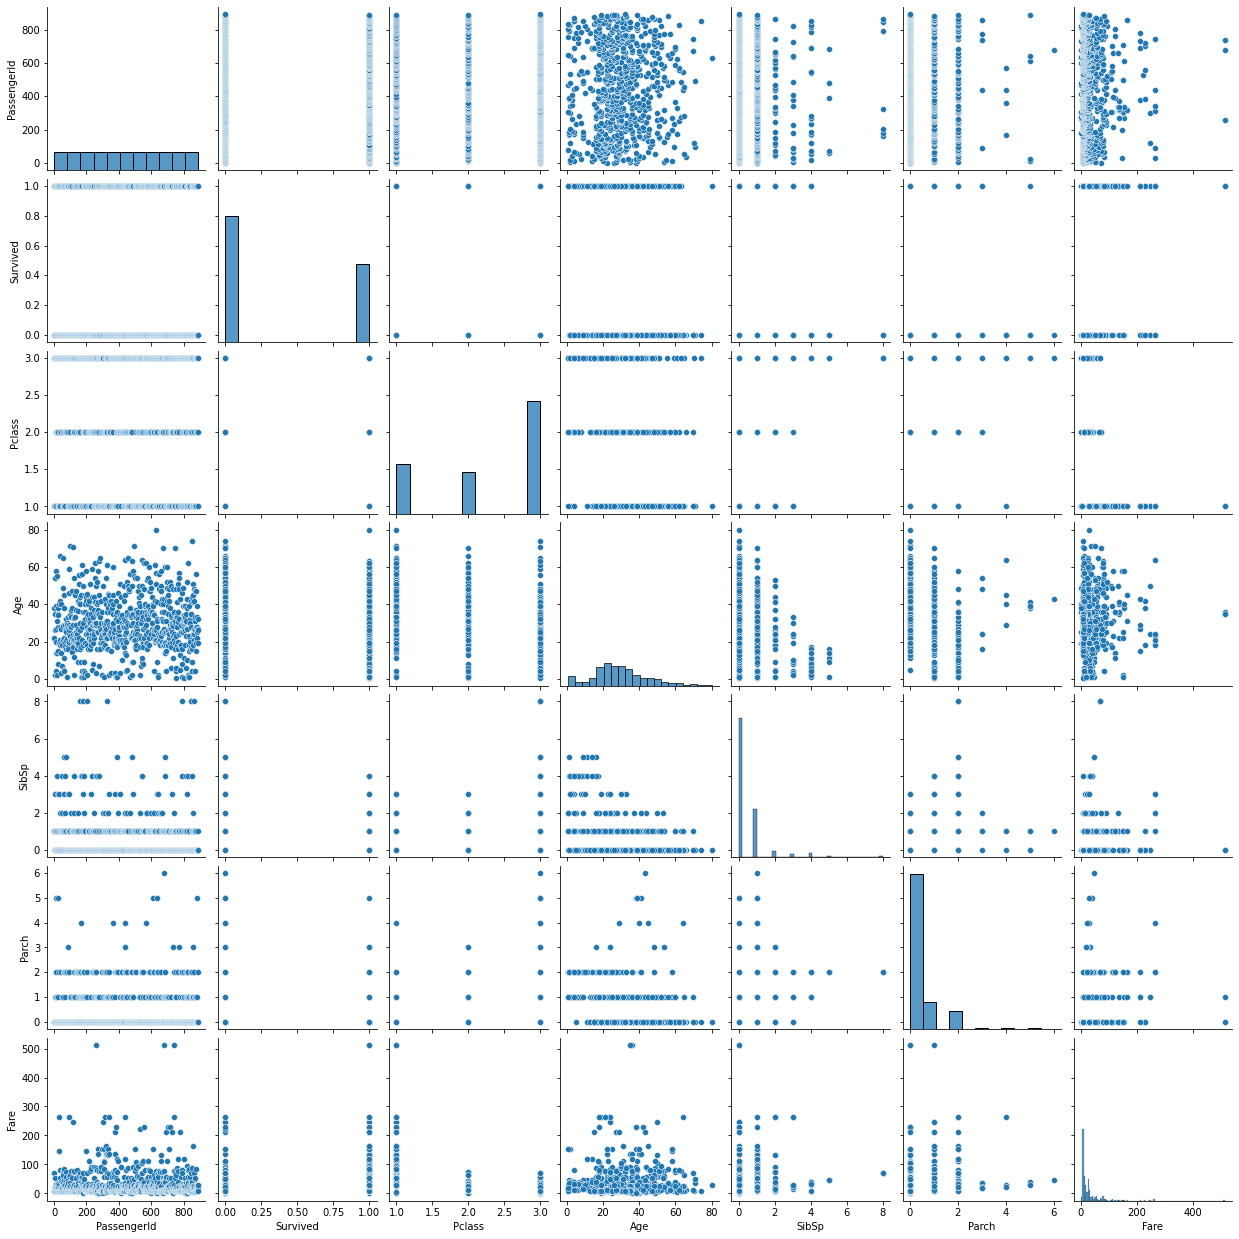

In [112]:
sns.pairplot(data = train_df)

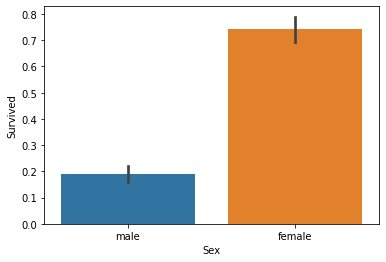

In [113]:
sns.barplot(x = "Sex",y = "Survived",data = train_df)

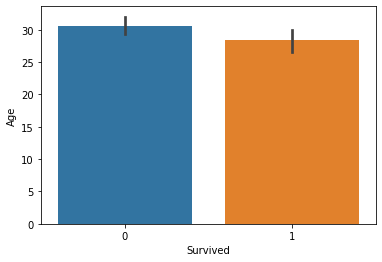

In [114]:
sns.barplot(y = "Age",x = "Survived",data = train_df)

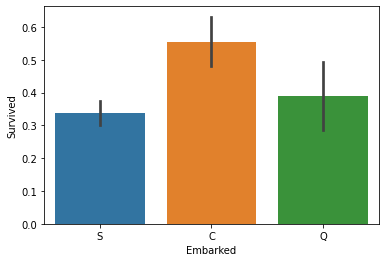

In [115]:
sns.barplot(x = "Embarked",y = "Survived",data = train_df)

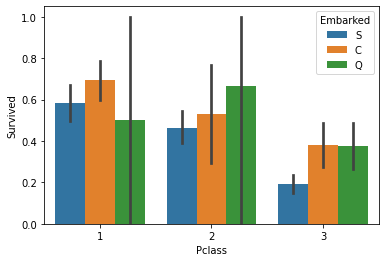

In [116]:
sns.barplot(x = "Pclass",y = "Survived",hue = "Embarked",data = train_df)

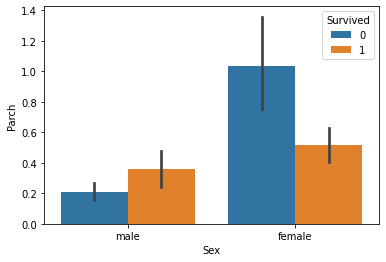

In [117]:
sns.barplot(y = "Parch",x = "Sex",hue = "Survived",data = train_df)

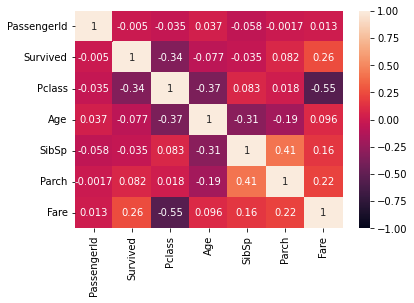

In [118]:
sns.heatmap(train_df.corr(),vmin = -1,vmax = 1,annot = True)

In [119]:
column_targets = ["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

all_columns = column_targets + features

In [120]:
def nan_checking():
    null_columns = {}
    for feature in all_columns:
        nulls = train_df[feature].isnull().sum()
        if nulls > 0:
            null_columns[feature] = nulls
    
    print(null_columns)

In [121]:
train_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True, axis=1)
test_df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [122]:
targets_df = train_df[column_targets]
targets_df

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [123]:
nan_checking()

{'Age': 177, 'Embarked': 2}


In [124]:
def one_hot_encoding(df):
    df['Sex'].replace(['male','female'],[0,1],inplace=True)
    df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
 

def fillna(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna('S', inplace=True)

In [125]:
fillna(train_df)
one_hot_encoding(train_df)
fillna(test_df)
one_hot_encoding(test_df)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,27.0,0,0,8.0500,0


In [126]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [127]:
nan_checking()
train_df.drop(labels=["Survived"], inplace=True, axis=1)

{}


In [128]:
train_df # All (7 features)
train_df_2 = train_df.copy()
train_df_2["Family"] = train_df_2.loc[:, "SibSp":"Parch"].sum(axis=1) # Sum SibSp and Parch (6 features)
train_df_2.drop(labels=["SibSp", "Parch"], inplace=True, axis=1)
train_df_3 = train_df.drop(columns="SibSp", inplace=False) # Without SibSp (6 features) 

In [129]:
test_df # All (7 features)
test_df_2 = test_df.copy()
test_df_2["Family"] = test_df_2.loc[:, "SibSp":"Parch"].sum(axis=1) # Sum SibSp and Parch (6 features)
test_df_2.drop(labels=["SibSp", "Parch"], inplace=True, axis=1)
test_df_3 = test_df.drop(columns="SibSp", inplace=False) # Without SibSp (6 features)

In [130]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [131]:
train_df_2.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0


In [132]:
train_df_3.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,0,22.0,0,7.2500,0
1,1,1,38.0,0,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,0,53.1000,0
4,3,0,35.0,0,8.0500,0


In [133]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [134]:
test_df_2.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1
2,2,0,62.0,9.6875,2,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,2


In [135]:
test_df_3.head()

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,0,34.5,0,7.8292,2
1,3,1,47.0,0,7.0000,0
2,2,0,62.0,0,9.6875,2
3,3,0,27.0,0,8.6625,0
4,3,1,22.0,1,12.2875,0


In [136]:
datadict = {
    "all": [train_df, test_df],
    "family": [train_df_2, test_df_2],
    "sibsp": [train_df_3, test_df_3]
}
datadict

{'all': [     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
  0         3    0  22.0      1      0   7.2500         0
  1         1    1  38.0      1      0  71.2833         1
  2         3    1  26.0      0      0   7.9250         0
  3         1    1  35.0      1      0  53.1000         0
  4         3    0  35.0      0      0   8.0500         0
  ..      ...  ...   ...    ...    ...      ...       ...
  886       2    0  27.0      0      0  13.0000         0
  887       1    1  19.0      0      0  30.0000         0
  888       3    1  28.0      1      2  23.4500         0
  889       1    0  26.0      0      0  30.0000         1
  890       3    0  32.0      0      0   7.7500         2
  
  [891 rows x 7 columns],
       Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
  0         3    0  34.5      0      0    7.8292         2
  1         3    1  47.0      1      0    7.0000         0
  2         2    0  62.0      0      0    9.6875         2
  3         3    0  27.0      0 

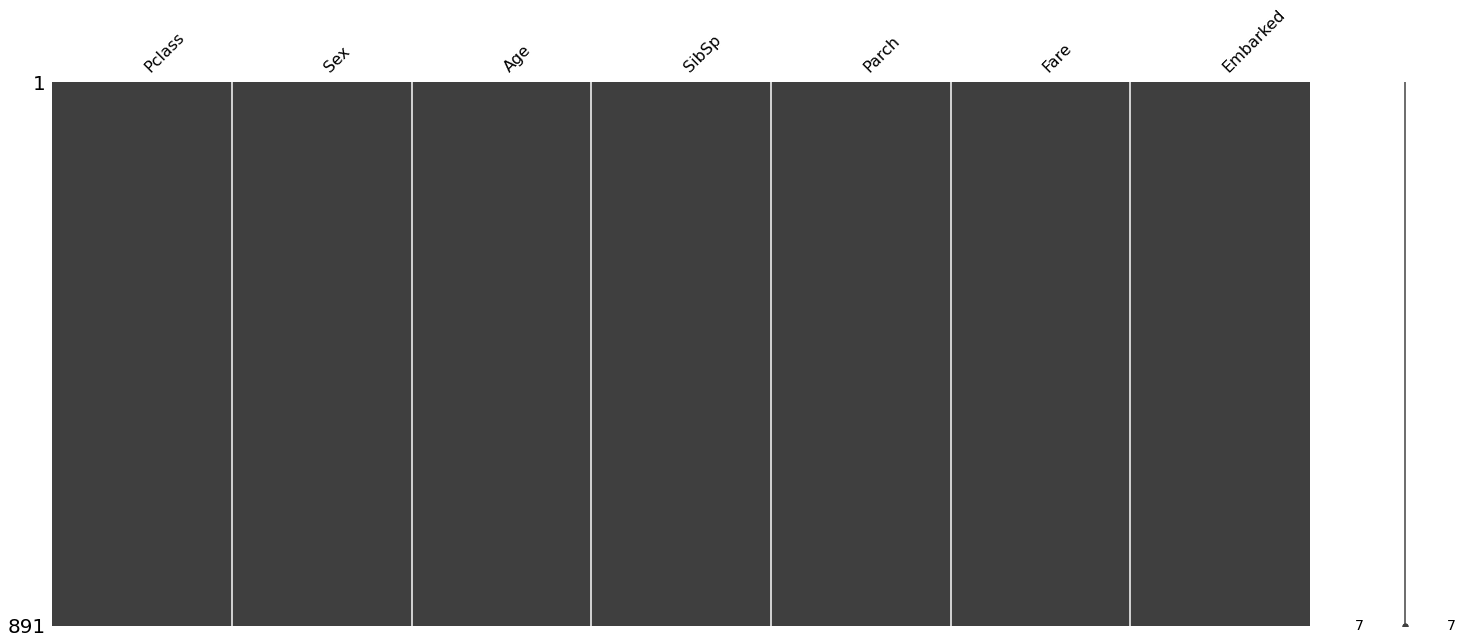

In [137]:
msno.matrix(train_df)

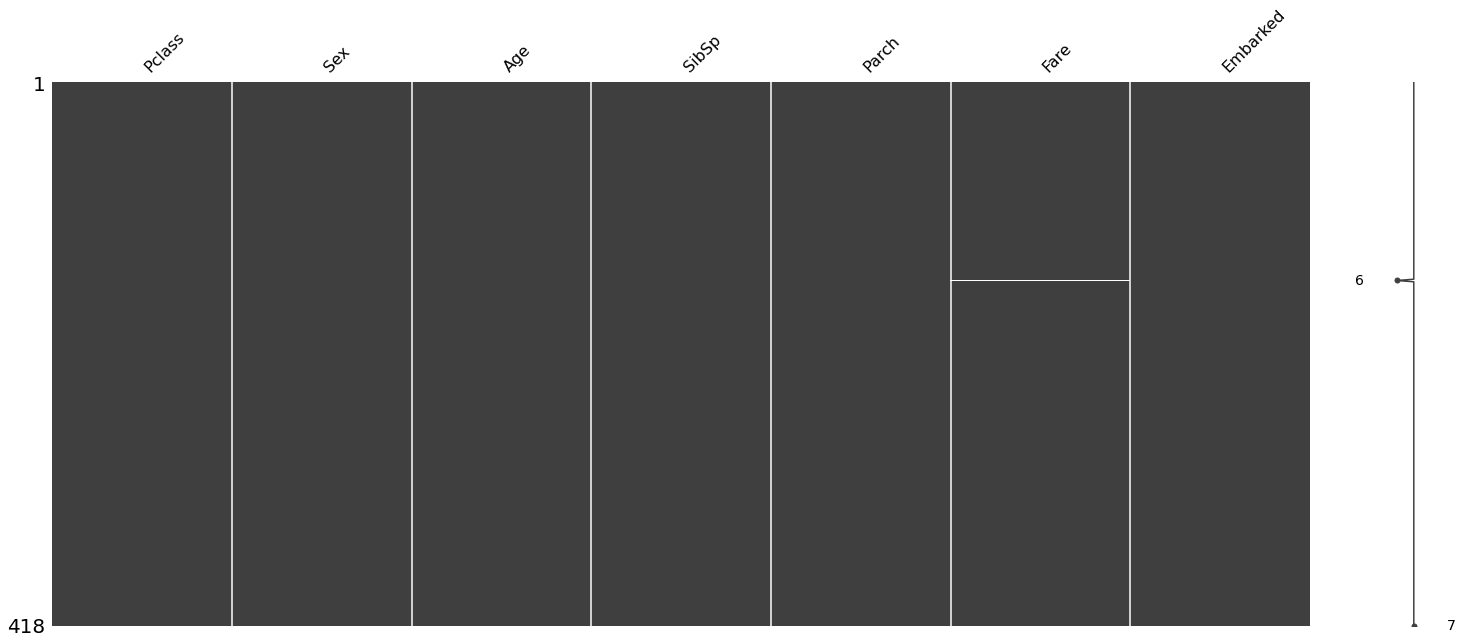

In [138]:
msno.matrix(test_df)

In [139]:
             #   0        1        2
data_state = [ "all", "family", "sibsp"]
STATE = 1
train_df, test_df = datadict.get(data_state[STATE])

In [140]:
train_df = train_df.to_numpy()
targets_df = targets_df.to_numpy()
test_df = test_df.to_numpy()

In [141]:
# death life
double_targets = [ [j-1, j] if j == 1 else [j+1, j] for j in [targets_df[i,0] for i in range(targets_df.shape[0])]]

double_targets = np.array(double_targets)

In [142]:
TEST_SIZE = 0.33
RANDOM_STATE = 60
NORMALIZATION = True

In [143]:
if NORMALIZATION:
    normal = MinMaxScaler().fit(train_df)
    train_df = normal.transform(train_df)
    test_df = normal.transform(test_df)

else:
    scaler = StandardScaler().fit(train_df)
    train_df = scaler.transform(train_df)
    test_df = scaler.transform(test_df)

In [144]:
x_train, x_test, y_train, y_test = train_test_split(train_df, double_targets, shuffle=True, random_state=RANDOM_STATE, test_size=TEST_SIZE)

In [145]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [146]:
CUDA_NOT = True
device = torch.device("cuda")

if not torch.cuda.is_available() or CUDA_NOT:
    device = torch.device("cpu")

In [147]:
class TitanicDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = torch.from_numpy(x_train.astype(np.float32)).to(device=device)
        self.y_train = torch.from_numpy(y_train.astype(np.float32)).to(device=device)
        self.n_samples = x_train.shape[0]
    
    def __len__(self):
        return self.n_samples
    
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

In [148]:
dataset = TitanicDataset(x_train, y_train)

In [149]:
EPOCH = 50
BATCH_SIZE = 60
ITERS = len(dataset) // BATCH_SIZE 

dataloader = DataLoader(dataset=dataset, shuffle=True, batch_size=BATCH_SIZE)
x_test_1 = torch.from_numpy(x_test.astype(np.float32)).to(device=device)
y_test_1 = torch.from_numpy(y_test.astype(np.float32)).to(device=device)

In [150]:
INPUT = x_train.shape[1]
HIDDEN_1 = 16
HIDDEN_2 = 16
HIDDEN_3 = 16
OUTPUT = 2
ALPHA = 0.01

In [151]:
class TitanicNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_1, hidden_2, hidden_3, output_size, device):
        super(TitanicNeuralNetwork, self).__init__()
        self.input_hidden = nn.Linear(in_features=input_size, out_features=hidden_1, device=device)
        self.hidden_hidden = nn.Linear(in_features=hidden_1, out_features=hidden_2, device=device)
        self.hidden_hidden_2 = nn.Linear(in_features=hidden_2, out_features=hidden_3, device=device)
        self.hidden_output = nn.Linear(in_features=hidden_3, out_features=output_size, device=device)
    
    def forward(self, x_data):
        x_data = F.leaky_relu(self.input_hidden(x_data))
        x_data = F.leaky_relu(self.hidden_hidden(x_data))
        x_data = F.leaky_relu(self.hidden_hidden_2(x_data))
        x_data = F.dropout(x_data, p = 0.22)
        y_predict = self.hidden_output(x_data)
        return y_predict

In [152]:
model = TitanicNeuralNetwork(INPUT, HIDDEN_1, HIDDEN_2, HIDDEN_3, OUTPUT, device)

In [153]:
def calc_accuracy(x_test_1, y_test_1):
    with torch.no_grad():
        x_predict = model(x_test_1).argmax(axis=1)
    y_test_max = y_test_1.argmax(axis=1)
    accuracy = torch.eq(x_predict, y_test_max).to(torch.int8).sum() / len(y_test_max)
    return accuracy

In [154]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)

In [155]:
accuracy_list = []


for epoch in range(EPOCH):
    for iters, (x, y) in enumerate(dataloader):

        # model
        y_predict = model(x)
        # loss
        loss = criterion(y_predict, y)
        # backward
        loss.backward()
        # optimizer
        optimizer.step()
        optimizer.zero_grad()
        # accurancy
        accuracy = calc_accuracy(x_test_1, y_test_1)
        accuracy_list.append(accuracy)
        
    if epoch % 2 == 0:
        print(f">> Epoch ~ [ {epoch+1} ] || >> Loss ~ [ {loss.item():.4f} ] || >> Accuracy ~ [ {accuracy:.2f} ]")

>> Epoch ~ [ 1 ] || >> Loss ~ [ 0.6671 ] || >> Accuracy ~ [ 0.70 ]
>> Epoch ~ [ 3 ] || >> Loss ~ [ 0.4237 ] || >> Accuracy ~ [ 0.77 ]
>> Epoch ~ [ 5 ] || >> Loss ~ [ 0.4588 ] || >> Accuracy ~ [ 0.79 ]
>> Epoch ~ [ 7 ] || >> Loss ~ [ 0.4566 ] || >> Accuracy ~ [ 0.81 ]
>> Epoch ~ [ 9 ] || >> Loss ~ [ 0.3929 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 11 ] || >> Loss ~ [ 0.4159 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 13 ] || >> Loss ~ [ 0.4548 ] || >> Accuracy ~ [ 0.79 ]
>> Epoch ~ [ 15 ] || >> Loss ~ [ 0.2995 ] || >> Accuracy ~ [ 0.79 ]
>> Epoch ~ [ 17 ] || >> Loss ~ [ 0.4116 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 19 ] || >> Loss ~ [ 0.3128 ] || >> Accuracy ~ [ 0.80 ]
>> Epoch ~ [ 21 ] || >> Loss ~ [ 0.3614 ] || >> Accuracy ~ [ 0.79 ]
>> Epoch ~ [ 23 ] || >> Loss ~ [ 0.4187 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 25 ] || >> Loss ~ [ 0.3246 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 27 ] || >> Loss ~ [ 0.4843 ] || >> Accuracy ~ [ 0.78 ]
>> Epoch ~ [ 29 ] || >> Loss ~ [ 0.4124 ] || >> Accur